<a href="https://colab.research.google.com/github/khalidme94/ML/blob/CH_8/Khalid_Almalki_Confudion_Matrix_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Confusion Matrix

#### Dataset Options
1. Binary Classification Dataset of Your Choice
2. Seattle Rain Dataset
    - `https://github.com/daniel-dc-cd/data_science/raw/master/module_3_Python/data/seattle_weather_1948-2017.csv`
    - Note: target is `RAIN`
3. Titanic Dataset
    - `https://github.com/daniel-dc-cd/data_science/raw/master/module_3_Python/data/titanic.csv`
3. Customer Churn
    - `https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv`
    - [Data dict](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)
    - Note: target is `Churn`
4. Iris dataset
    - `https://raw.githubusercontent.com/gumdropsteve/datasets/master/iris.csv`
    - Note: 3 possible classes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

1. Load in your dataset.

In [2]:
df=pd.read_csv('https://github.com/daniel-dc-cd/data_science/raw/master/module_3_Python/data/seattle_weather_1948-2017.csv')

2. Find out some information about the data...

In [3]:
df.shape

(25551, 5)

In [4]:
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [5]:
df.sample(5)

,DATE,PRCP,TMAX,TMIN,RAIN
213,1948-08-01,0.00,75,54,False
9813,1974-11-13,0.00,50,45,False
423,1949-02-27,0.00,62,32,False
1854,1953-01-28,0.47,49,38,True
14858,1988-09-05,0.00,60,55,False


In [6]:
df.value_counts()

DATE        PRCP  TMAX  TMIN  RAIN 
2017-12-14  0.00  50    36    False    1
1971-04-17  0.15  56    43    True     1
1971-04-19  0.00  60    40    False    1
1971-04-20  0.08  51    44    True     1
1971-04-21  0.00  54    41    False    1
                                      ..
1994-08-21  0.00  72    60    False    1
1994-08-22  0.00  68    58    False    1
1994-08-23  0.00  75    59    False    1
1994-08-24  0.00  75    54    False    1
1948-01-01  0.47  51    42    True     1
Length: 25548, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


Replacing 'True' , 'False' in 'RAIN' to (1,0)

In [8]:
df['RAIN']=df['RAIN'].replace([True,False],(1,0))
df.sample(5)

,DATE,PRCP,TMAX,TMIN,RAIN
4208,1959-07-10,0.00,84,57,0.0
13762,1985-09-05,0.12,66,56,1.0
14285,1987-02-10,0.03,61,47,1.0
11778,1980-03-31,0.18,47,38,1.0
3598,1957-11-07,0.00,46,37,0.0


Checking for Null values

In [9]:
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

Checking for Outliers

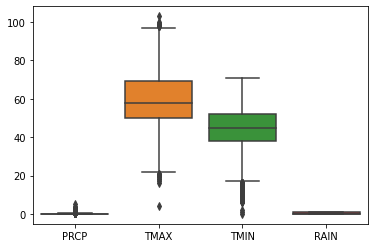

In [10]:
sns.boxplot(data=df)

Removing Outliers

In [11]:
y = df['PRCP']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
df['PRCP']=df['PRCP'][removed_outliers]


In [12]:
y = df['TMIN']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
df['TMIN']=df['TMIN'][removed_outliers]

In [13]:
y = df['TMAX']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
df['TMAX']=df['TMAX'][removed_outliers]

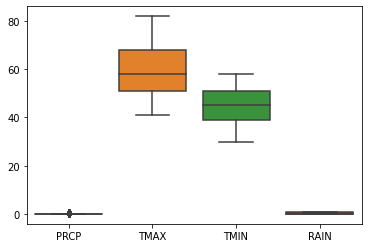

In [14]:
sns.boxplot(data=df,)

3. Show me the relationships in your data... 
- corr ([help](https://stackoverflow.com/a/50703596/11074111))
- pariplot
- some other visualizations (of your choice)

In [15]:
corr=df.corr()
corr

,PRCP,TMAX,TMIN,RAIN
PRCP,1.000000,-0.304738,-0.135507,0.654082
TMAX,-0.304738,1.000000,0.809129,-0.402467
TMIN,-0.135507,0.809129,1.000000,-0.180299
RAIN,0.654082,-0.402467,-0.180299,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


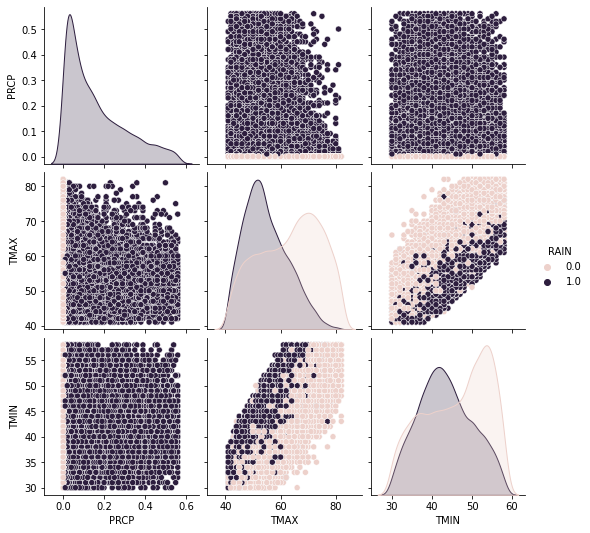

In [16]:
sns.pairplot(df,hue='RAIN')

In [17]:
corr.style.background_gradient(cmap='coolwarm')

,PRCP,TMAX,TMIN,RAIN
PRCP,1.000000,-0.304738,-0.135507,0.654082
TMAX,-0.304738,1.000000,0.809129,-0.402467
TMIN,-0.135507,0.809129,1.000000,-0.180299
RAIN,0.654082,-0.402467,-0.180299,1.000000


4. Perform any data prep that needs to be done before splitting...

Note: may not be necessary, may require more cells

In [18]:
df=df.dropna()

In [19]:
df.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [20]:
df.shape

(21202, 5)

5. Split your data into training and testing datasets...

In [21]:
col=['PRCP']
X=df[col]
y=df['RAIN']

X_train,  X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

6. Import, create, and fit a LogisticRegression model with 1 variable

In [22]:
lr=LogisticRegression(fit_intercept=True,
                      warm_start=False)

In [23]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

6. Make predictions on your `X_test` values...

In [24]:
pred=lr.predict(X_test)
pred

array([0., 0., 1., ..., 0., 1., 0.])

what do they look like? (show me some of the predictions)

7. Score your model...
- accuracy_score

In [25]:
accuracy_score(y_test,pred)

0.9108630718440497

8. Confustion Matrix

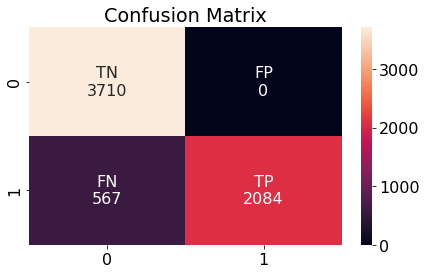

In [26]:
cf = confusion_matrix(y_test, pred)

names =  ['TN', 'FP', 'FN','TP']
# make %s seen in graph
perc = ["{0}".format(value) for value in
                     cf.flatten()]
# make strings from bundle of names & perc
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(names, perc)]
labels = np.asarray(labels).reshape(2, 2)

# make plot
plt.figure(figsize=(7, 4))  # set up white canvis
plt.rcParams.update({'font.size': 16})  # font size
sns.heatmap(cf, annot=labels, fmt='').set_title("Confusion Matrix");  # make it happen

9. Explain your confusion matrix...
- How many of each value (TP, FP, TN, FN) do you have?
- What does each mean?

As seen above, values of confusion matrix are as following:
- TP: 2087 , which means that there are 2087 positive predected values match the positive actual values
- FP:0 , which means that there are no predected value incorrectly accounted as positive value
- TN:3694 , which means that there are 3694 negative predected values match the negative actual values
- FN:580 , which means that there are 580 negative predected values incorrectly accounted as positive values


10. Create, and fit a LogisticRegression model with **more than** 1 variable

In [27]:
col=['PRCP','TMAX']
X=df[col]
y=df['RAIN']

X_train,  X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [28]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

11. Make predictions on your `X_test` values...

In [29]:
pred=lr.predict(X_test)
pred

array([0., 0., 0., ..., 1., 0., 0.])

what do they look like? (show me some of the predictions)

12. Score your model...
- accuracy_score


In [30]:
accuracy_score(y_test,pred)

0.9146360635120264

13.  Confustion Matrix

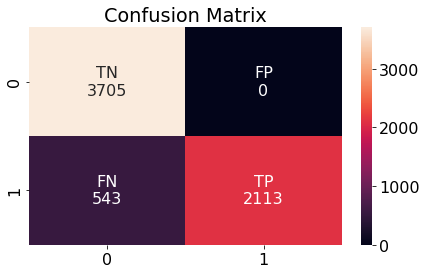

In [31]:
cf = confusion_matrix(y_test, pred)

names =  ['TN', 'FP', 'FN','TP']
# make %s seen in graph
perc = ["{0}".format(value) for value in
                     cf.flatten()]
# make strings from bundle of names & perc
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(names, perc)]
labels = np.asarray(labels).reshape(2, 2)

# make plot
plt.figure(figsize=(7, 4))  # set up white canvis
plt.rcParams.update({'font.size': 16})  # font size
sns.heatmap(cf, annot=labels, fmt='').set_title("Confusion Matrix");  # make it happen

14.  Explain your confusion matrix...
- How many of each value do you have?
- What does each mean?

As seen above, values of confusion matrix are as following:
- TP: 2069 , which means that there are 2069 positive predected values match the positive actual values
- FP:0 , which means that there are no predected value incorrectly accounted as positive value
- TN:3738 , which means that there are 3738 negative predected values match the negative actual values
- FN:554 , which means that there are 554 negative predected values incorrectly accounted as positive values


15. Which model is better? Why?

The Second model is better in accuracy score

but the First model is better in confusing matrix

## Bonus

16. Perform GridSearchCV with the better data

In [32]:


p_grid = {'fit_intercept': [True, False],
          'warm_start': [True, False]}

grid = GridSearchCV(lr, p_grid,cv=5)



In [33]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'warm_start': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
grid.best_params_

{'fit_intercept': True, 'warm_start': True}

17. Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)

In [35]:
lr=LogisticRegression(fit_intercept=True,
                      warm_start=True)

In [36]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)

14. Accuracy Score and Confusion Matrix

In [37]:
accuracy_score(y_test,pred)

0.9146360635120264

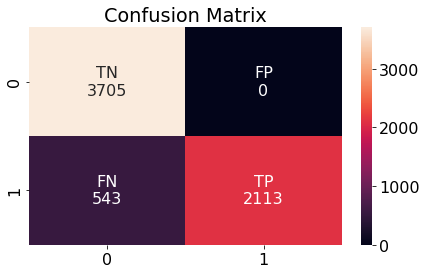

In [38]:
cf = confusion_matrix(y_test, pred)

names =  ['TN', 'FP', 'FN','TP']
# make %s seen in graph
perc = ["{0}".format(value) for value in
                     cf.flatten()]
# make strings from bundle of names & perc
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(names, perc)]
labels = np.asarray(labels).reshape(2, 2)

# make plot
plt.figure(figsize=(7, 4))  # set up white canvis
plt.rcParams.update({'font.size': 16})  # font size
sns.heatmap(cf, annot=labels, fmt='').set_title("Confusion Matrix");  # make it happen

Did the score change at all? Why?

No, I do not know why

### Bonus Bonus
Figure out ROC plot. Tell me about it.

your stuff here

your stuff here